# Equation of Hydrostatic Equilibrium                                                
<div style="text-align: right"> Jude McClay and Rasheed Miladi </div>

$\frac{dm(r)}{dr} = 4\pi r^2\rho$                                         (1)

$\frac{dP}{dr} = \frac{-Gm(r)\rho (r)}{r^2}$                                      (2)

$P = Ku^{\gamma}(r)$ (3),

where $u(r)$ is the energy density.

$u(r) = \rho (r)c^2$ (4).

This can be substituted into Equation 3 to produce

$P = Kc^{2\gamma}\rho^{\gamma}(r)$.(5)

Since $\frac{dP}{dr}=\frac{dP}{d\rho}\frac{d\rho}{dr} = Kc^{2\gamma}\gamma\rho^{\gamma -1}\frac{d\rho}{dr}$, 

$\Longrightarrow \frac{d\rho}{dr} = \frac{-G}{Kc^{2\gamma}\gamma}\frac{m(r)\rho^{2-\gamma}(r)}{r^2}$. (6)

In [8]:
#imports
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
from scipy import constants

from matplotlib import rc
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rcParams['figure.dpi'] = 100
%matplotlib inline

In [9]:
gamma = 1
K = 10^5
c = constants.speed_of_light # 3 x 10^8 m/s
G = constants.gravitational_constant # 6.67*10**-11


In [10]:
def mass_derivative(rho, m, r):
    """
    Calculates dm/dr using Equation 1.
    """
    return 4*(np.pi)*(r**2)*rho

def density_derivative(rho, m, r):
    """
    Calculates d(rho)/dr using Equation 6.
    """
    return -(G * m / (K * c**(2*gamma) * gamma))*(r**-2)*(rho**(2 - gamma))


In [11]:
#rk4 does a single RK4 step
def rk4_1(y_1, y_2, derivative_function, t, h):
    
    k1 = derivative_function(y_1, y_2, t)
    k2 = derivative_function(y_1 + h/2*k1, y_2, t+h/2)
    k3 = derivative_function(y_1 + h/2*k2, y_2, t+h/2)
    k4 = derivative_function(y_1 + h*k3, y_2, t+h)
    
    y_1 = y_1 + h * (k1 + 2 * k2 + 2 * k3 + k4)/6
    t = t + h
    
    return (t, y_1)

def rk4_2(y_1, y_2, derivative_function, t, h):
    
    k1 = derivative_function(y_1, y_2, t)
    k2 = derivative_function(y_1, y_2  + h/2*k1, t+h/2)
    k3 = derivative_function(y_1, y_2  + h/2*k2, t+h/2)
    k4 = derivative_function(y_1, y_2  + h*k3, t+h)
    
    y_2 = y_2 + h * (k1 + 2 * k2 + 2 * k3 + k4)/6
    t = t + h
    
    return (t, y_2)

In [12]:
density = 10**6  
mass_enclosed = 0  

r = 0.1               # distance start
h = 0.01               # step size
rmax = 10              # where to end

r_values=np.array([r])     # to store all distances

densities = np.array([density])     # and all solution points for rho(r)
mass_enclosed_values = np.array([mass_enclosed])     # all solution points for m(r)


In [13]:
for i in range(int(rmax/h)):  # take enough steps (or so)
    
    (r, m)=rk4_1(density, mass_enclosed, mass_derivative, r, h)
    (r, rho)=rk4_2(density, mass_enclosed, density_derivative, r - h, h)
    #print(r, m, rho)
    r_values=np.append(r_values,r)
    densities = np.append(densities, rho)
    mass_enclosed_values = np.append(mass_enclosed_values, m)
    
print(r_values, densities, mass_enclosed_values)

[ 0.1   0.11  0.12 ... 10.08 10.09 10.1 ] [1000000.       0.       0. ...       0.       0.       0.] [0.00000000e+00 1.00138745e+06 1.00166433e+06 ... 1.54403932e+09
 1.55524224e+09 1.56651764e+09]


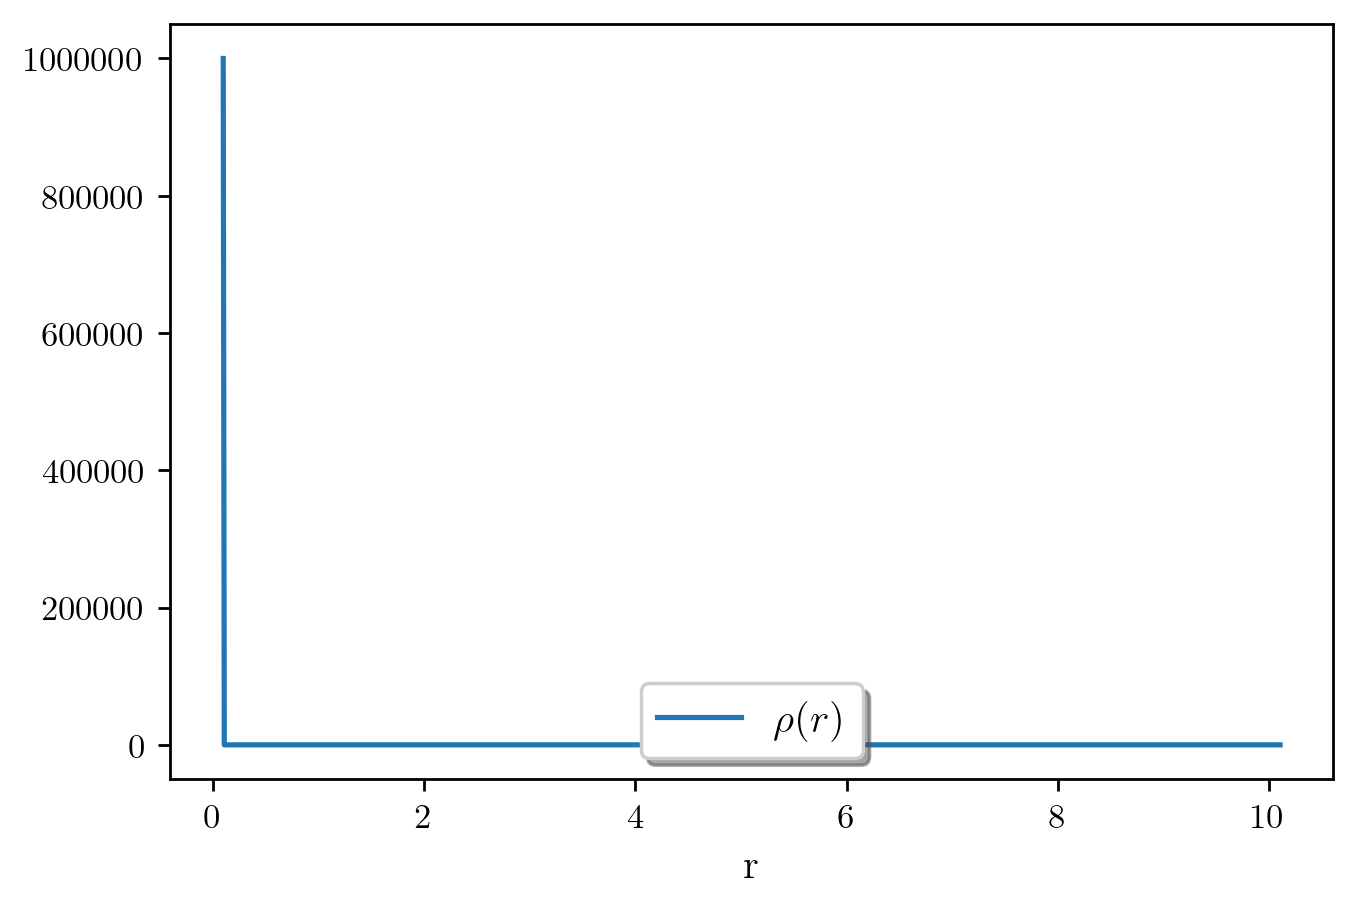

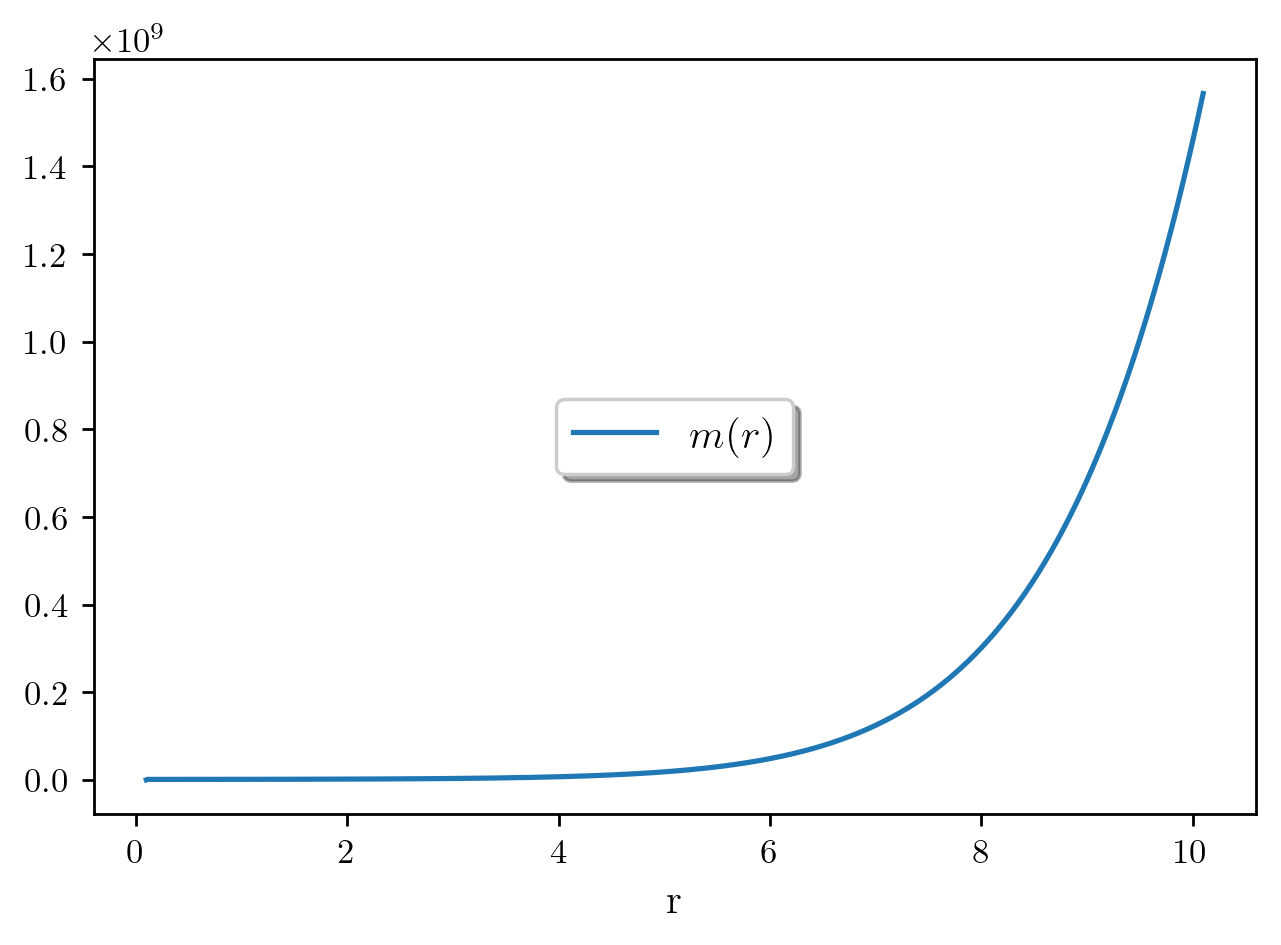

In [14]:
#now plot it all
densities = densities.transpose()
mass_enclosed_values = mass_enclosed_values.transpose()



#Density plot

fig1 = plt.figure(dpi = 250)
ax1 = fig1.add_subplot(111)

ax1.plot(r_values, densities, label='$\\rho(r)$')


ax1.legend(loc='lower center', shadow=True, fontsize='large')
ax1.set_xlabel("r", fontsize = 'large')
plt.show()

#Mass plot

fig2 = plt.figure(dpi = 250)
ax2 = fig2.add_subplot(111)

ax2.plot(r_values, mass_enclosed_values, label='$m(r)$')

ax2.legend(loc='center', shadow=True, fontsize='large')
ax2.set_xlabel("r",fontsize='large')
plt.show()



